In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
df = pd.read_csv(r"C:\Users\mishr\Desktop\Naresh i\OCTOBER\4th- REGRESSION PROJECT\4th- REGRESSION PROJECT\RESUME PROJECT -- PRICE PREDICTION\avocado.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


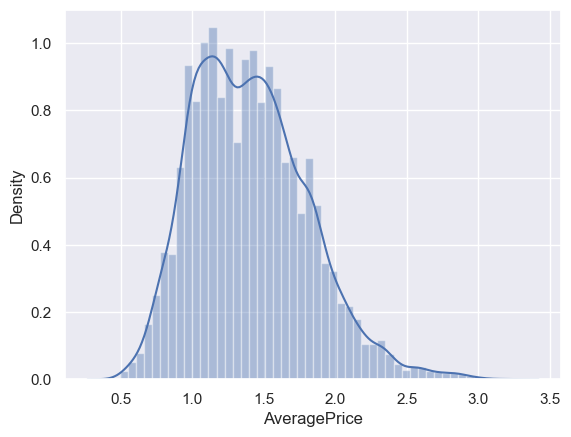

In [6]:
sns.distplot(df["AveragePrice"])
plt.show()

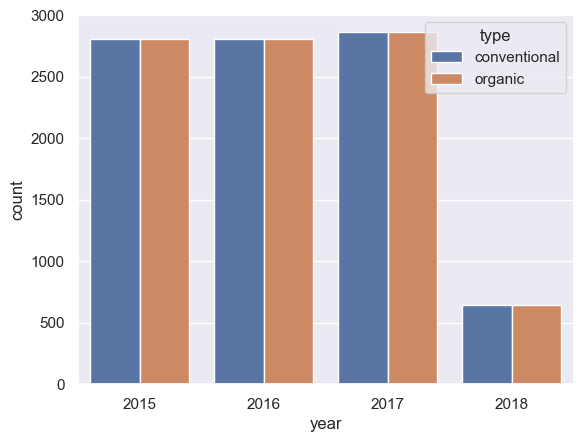

In [7]:
sns.countplot(data=df,x='year',hue='type');

In [8]:
df.year.value_counts() #To count the observational values in the following year.

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

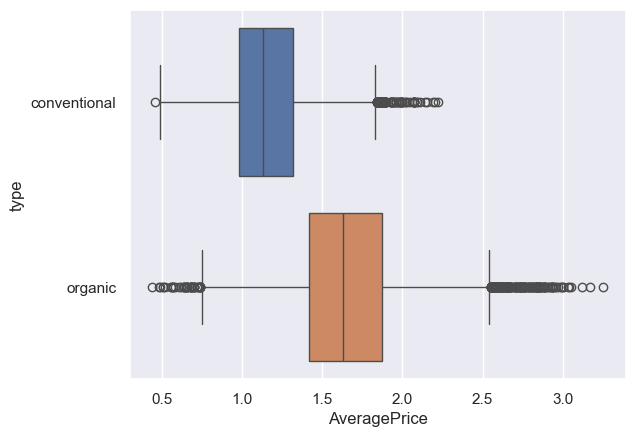

In [9]:
sns.boxplot(data = df, x="AveragePrice", y="type", hue="type");

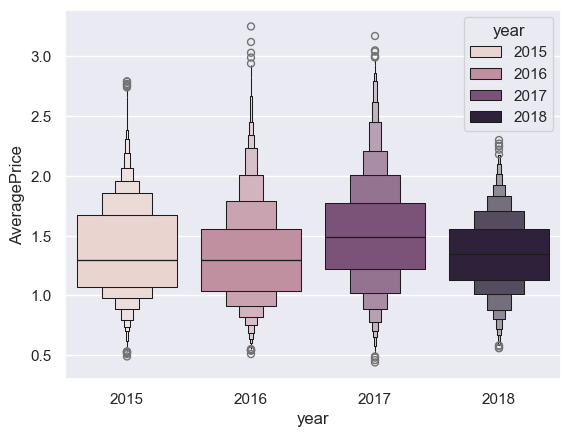

In [10]:
sns.boxenplot(data=df,x="year",y="AveragePrice",hue="year");

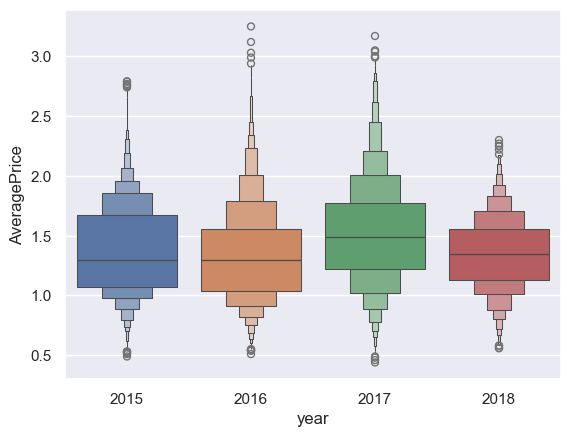

In [11]:
df.year=df.year.apply(str)
sns.boxenplot(data=df,x="year",y="AveragePrice",hue="year");

In [12]:
df['type'] = df['type'].map({'conventional': 0, 'organic': 1})
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name().str[:3]
df.drop('Date', axis=1, inplace=True)

In [13]:
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,Dec
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,Dec
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,Dec
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,Dec
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,Nov


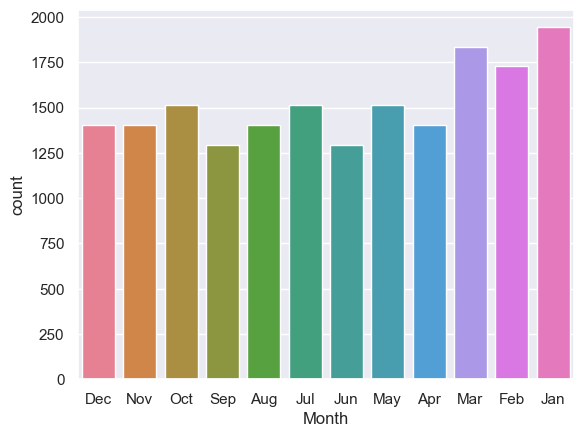

In [14]:
sns.countplot(data = df , x='Month',hue='Month');

In [15]:
dummies = pd.get_dummies(df[['year','region','Month']],drop_first=True)


df_dummies = pd.concat([df[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)

target = df['AveragePrice']

In [16]:
df_dummies.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year_2016,...,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,False,...,True,False,False,False,False,False,False,False,False,False
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,False,...,True,False,False,False,False,False,False,False,False,False
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,False,...,True,False,False,False,False,False,False,False,False,False
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,False,...,True,False,False,False,False,False,False,False,False,False
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,False,...,False,False,False,False,False,False,False,True,False,False


In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_dummies,target,test_size=0.30)

cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(x_train[cols_to_std])

x_train[cols_to_std] = scaler.transform(x_train[cols_to_std])

x_test[cols_to_std] = scaler.transform(x_test[cols_to_std])

In [18]:
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}

In [19]:
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(x_train,y_train)
    pred = model.predict(x_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.20)


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(76,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [21]:
model.fit(x=x_train.values.astype('float'),y=y_train.values.astype('float'),
          validation_data=(x_val.values.astype('float'),y_val.values.astype('float')),
          batch_size=100,epochs=150,callbacks=[early_stop])

Epoch 1/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6022 - val_loss: 0.0765
Epoch 2/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1207 - val_loss: 0.0572
Epoch 3/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1024 - val_loss: 0.0737
Epoch 4/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0892 - val_loss: 0.0443
Epoch 5/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0774 - val_loss: 0.0547
Epoch 6/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0754 - val_loss: 0.0381
Epoch 7/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0660 - val_loss: 0.0385
Epoch 8/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0628 - val_loss: 0.0353
Epoch 9/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0612 - val_loss: 0.0357
Epoch 10/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0560 - val_loss: 0.0348
Epoch 11/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0575 - val_loss: 0.0315
Epoch 12/150
103/103 ━━━━━━━━━━━━━━━━━━━━

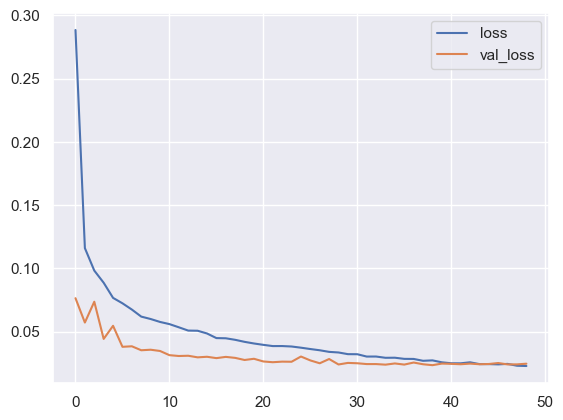

In [22]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

In [23]:
dnn_pred = model.predict(x_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [24]:
results.loc['Deep Neural Network']=[mean_absolute_error(y_test,dnn_pred).round(3),mean_squared_error(y_test,dnn_pred).round(3),
                                    r2_score(y_test,dnn_pred).round(3)]
results

,MAE,MSE,R2-score
Linear Regression,0.182,0.058,0.648
Decision Tree,0.134,0.043,0.738
Random Forest,0.096,0.019,0.886
Support Vector Machines,0.117,0.028,0.829
K-nearest Neighbors,0.100,0.023,0.857
XGBoost,0.095,0.017,0.895
Deep Neural Network,0.114,0.025,0.846


In [25]:
f"10% of mean of target variable is {np.round(0.1 * df.AveragePrice.mean(),3)}"

'10% of mean of target variable is 0.141'

In [26]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
XGBoost,0.095000,0.017000,0.895000
Random Forest,0.096000,0.019000,0.886000
K-nearest Neighbors,0.100000,0.023000,0.857000
Deep Neural Network,0.114000,0.025000,0.846000
Support Vector Machines,0.117000,0.028000,0.829000
Decision Tree,0.134000,0.043000,0.738000
Linear Regression,0.182000,0.058000,0.648000
